# **Value Iteration + Policy Evaluation + Policy Improvement**

*Created by Pulkit Rustagi ans Skand, 2024
Oregon State AIGSA Reading Group*

This Google Colab notebook is made to help students understand and visualize process of value iteration and policy iteration to solve a Markov Decision Process (MDP) using the example of a grid maze.

# **Run this block to install and import dependencies**

In [ ]:
"""Import packages"""
!pip install simple-colors


In [ ]:
import simple_colors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# **Maze MDP Class**

In [ ]:
class MazeMDP:
  def __init__(self, maze, start_state=(0,0)):
    self.maze = maze
    self.rows = len(maze)
    self.cols = len(maze[0])
    self.start_state = start_state
    self.goal_state = self._find_goal_state()  # Find the 'G' in the maze
    self.S = [(i, j) for i in range(self.rows) for j in range(self.cols) ]  # Exclude walls
    self.A = [0, 1, 2, 3] # {0: 'Up', 1: 'Right', 2: 'Down', 3: 'Left'}  # Actions
    self.reward = self._init_rewards()  # Rewards
    self.transition = self._init_transition_function()  # Transitions

  def _find_goal_state(self):
    for i in range(self.rows):
      for j in range(self.cols):
        if self.maze[i][j] == 'G':
          return (i, j)
    raise ValueError("Goal state 'G' not found in maze.")

  def _init_rewards(self):
    rewards = {}
    for s in self.S:
      if s == self.goal_state:
        rewards[s] =  0.0  # Goal state reward
      else:
        rewards[s] = -1.0  # Non-goal state reward
    return rewards

  def _init_transition_function(self):
    transitions = {(s1, a, s2): 0.0 for s1 in self.S for a in self.A for s2 in self.S}
    for s in self.S:
      for a in self.A:
        s_prime = self.move(s, a)
        if s != self.goal_state:
            transitions[(s, a, s_prime)] = 1.0
        elif s == self.goal_state and s_prime == self.goal_state:
            transitions[(s, a, s_prime)] = 1.0 / len(self.A)
        else:
            transitions[(s, a, s_prime)] = 0.0
    for a in self.A:
        transitions[(self.goal_state, a, self.goal_state)] = 1.0 / len(self.A)
    return transitions

  def move(self, state, action):
    i, j = state
    if action == 0 and i > 0 and self.maze[i - 1][j] != '#':  # Up
      return (i - 1, j)
    elif action == 1 and j < self.cols - 1 and self.maze[i][j + 1] != '#':  # Right
      return (i, j + 1)
    elif action == 2 and i < self.rows - 1 and self.maze[i + 1][j] != '#':  # Down
      return (i + 1, j)
    elif action == 3 and j > 0 and self.maze[i][j - 1] != '#':  # Left
      return (i, j - 1)
    return state  # If move is out of bounds or into a wall, stay in the same state

  def R(self, s, a):
    # base case if s is a goal state
    if self.is_goal_state(s):
      return 0
    s_next = self.move(s, a)
    return self.reward[s_next]

  def T(self, s, a, s_next):
    return self.transition[(s, a, s_next)]

  def is_goal_state(self, s):
    return s == self.goal_state

# **Test the code**

In [ ]:
# maze = [
#     [' ', ' ', ' ', '#', ' '],
#     [' ', '#', ' ', '#', ' '],
#     [' ', '#', ' ', ' ', ' '],
#     [' ', ' ', '#', 'G', ' '],
#     ['#', ' ', ' ', ' ', ' ']
# ]

maze = [
    [' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', 'G', ' '],
    [' ', ' ', ' ', ' ', ' ']
]

# maze = [
#             [' ', ' ', ' '],
#             [' ', ' ', ' '],
#             [' ', ' ', 'G'],
#        ]

# maze = [
#             [' ', ' '],
#             [' ', 'G'],
#        ]
mdp = MazeMDP(maze)

"""
print("Verify if following transition and reward is correct!")

def verify_transitions(s,a,s_next):
  action_name = {0: 'Up', 1: 'Right', 2:'Down', 3: 'Left'}
  print("\t"+str(s)+" , "+str(action_name[a])+" --> "+str(s_next))
  T = mdp.T(s, a, s_next)
  if T != 0.0:
    print(simple_colors.green("\tTransition probability: "+str(T), ['bold']))
    reward = mdp.R(s, a)
    print(f"\tReward: {reward}")
  else:
    print(simple_colors.red("\tTransition probability: "+str(T), ['bold']))


print("Case 1:")
s = (2, 3)
a = 2  # Move Down
s_next = (3, 3)
verify_transitions(s,a,s_next)

print("Case 2:")
s = (2, 4)
a = 3  # Move left
s_next = (2, 3)
verify_transitions(s,a,s_next)

print("Case 3:")
s = (0, 1)
a = 2  # Move left
s_next = (2, 3)
verify_transitions(s,a,s_next)
"""

'\nprint("Verify if following transition and reward is correct!")\n\ndef verify_transitions(s,a,s_next):\n  action_name = {0: \'Up\', 1: \'Right\', 2:\'Down\', 3: \'Left\'}\n  print("\t"+str(s)+" , "+str(action_name[a])+" --> "+str(s_next))\n  T = mdp.T(s, a, s_next)\n  if T != 0.0:\n    print(simple_colors.green("\tTransition probability: "+str(T), [\'bold\']))\n    reward = mdp.R(s, a)\n    print(f"\tReward: {reward}")\n  else:\n    print(simple_colors.red("\tTransition probability: "+str(T), [\'bold\']))\n\n\nprint("Case 1:")\ns = (2, 3)\na = 2  # Move Down\ns_next = (3, 3)\nverify_transitions(s,a,s_next)\n\nprint("Case 2:")\ns = (2, 4)\na = 3  # Move left\ns_next = (2, 3)\nverify_transitions(s,a,s_next)\n\nprint("Case 3:")\ns = (0, 1)\na = 2  # Move left\ns_next = (2, 3)\nverify_transitions(s,a,s_next)\n'

# **Value Iteration Agent Class**
Bellman Backup

  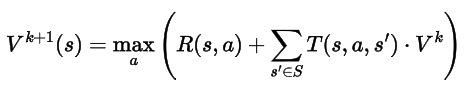

In [ ]:
class ValueIterationAgent:
  def __init__(self, mdp, discount_factor=0.95, threshold=1e-4):
    self.mdp = mdp
    self.discount_factor = discount_factor
    self.threshold = threshold
    self.V = {s: 0 for s in self.mdp.S}  # Initialize state values to 0
    self.policy = {s: None for s in self.mdp.S}  # Initialize empty policy
    self.run_value_iteration()  # Run value iteration at initialization

  def run_value_iteration(self):
    while True:
      delta = 0
      new_V = self.V.copy()

      for s in self.mdp.S:
        if self.mdp.is_goal_state(s):
            best_action = np.random.choice(self.mdp.A)
            self.policy[s] = best_action
            continue  # Skip value update for the goal state

        max_value = float('-inf')
        best_action = None
        if s == self.mdp.goal_state:
          self.V[s] = 0  # Set the value of the goal state to 0
          continue
        # Loop over possible actions and compute Q-values
        for a in self.mdp.A:
          q_value = 0

          for s_prime in self.mdp.S:
            prob = self.mdp.T(s, a, s_prime)
            reward = self.mdp.R(s, a)
            q_value += prob * (reward + self.discount_factor * self.V[s_prime])

          if q_value > max_value:
            max_value = q_value
            best_action = a

        new_V[s] = max_value
        delta = max(delta, abs(self.V[s] - new_V[s]))
        self.policy[s] = best_action  # Update policy with the best action

      self.V = new_V

      if delta < self.threshold:
        break

  def get_policy(self):
    return {s: self.mdp.A[self.policy[s]] if self.policy[s] is not None else None for s in self.mdp.S}

  def get_value(self, s):
    return self.V[s]

  def get_action(self, s):
    return self.mdp.A[self.policy[s]] if self.policy[s] is not None else None

  ######## This function is only for visualization (NO NEED TO EDIT) #########

  def visualize_values(self):
    # Create a 2D numpy array to hold the state values
    value_grid = np.zeros((self.mdp.rows, self.mdp.cols))

    # Fill the grid with state values, marking walls with NaN for visualization
    for i in range(self.mdp.rows):
      for j in range(self.mdp.cols):
        state = (i, j)
        if self.mdp.maze[i][j] == '#':
          value_grid[i, j] = np.nan  # Mark walls with NaN
        else:
          value_grid[i, j] = self.get_value(state)

    # Create a custom color map from black to blue
    cmap = sns.color_palette("Blues", as_cmap=True)

    # Plot the heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(value_grid, annot=True, cmap=cmap, cbar=True, square=True, linewidths=0.5,
                linecolor='black', mask=np.isnan(value_grid), annot_kws={"size": 16}, fmt=".1f")

    # plt.title("Value Function Heatmap")
    wall_locations = [(j,i) for i in range(self.mdp.rows) for j in range(self.mdp.cols) if self.mdp.maze[i][j] == '#']
    # Overlay dashed texture for walls
    for wall_loc in wall_locations:
      # Create a rectangle for the wall with a dashed texture
      rect = plt.Rectangle(wall_loc, 1, 1, hatch='/', fill=False)
      plt.gca().add_patch(rect)

    plt.title("Value Function Heatmap")

    plt.show()


  def visualize_policy(self, policy):
    # Create a 2D numpy array to hold the state values
    value_grid = np.zeros((self.mdp.rows, self.mdp.cols))

    # Fill the grid with state values, marking walls with NaN for visualization
    for i in range(self.mdp.rows):
      for j in range(self.mdp.cols):
        state = (i, j)
        if self.mdp.maze[i][j] == '#':
          value_grid[i, j] = np.nan  # Mark walls with NaN
        else:
          value_grid[i, j] = self.get_value(state)
    # Create a 2D numpy array to hold the action letters
    policy_grid = np.full((self.mdp.rows, self.mdp.cols), '', dtype=object)

    # Fill the grid with action letters, marking walls with NaN for visualization
    for i in range(self.mdp.rows):
      for j in range(self.mdp.cols):
        state = (i, j)
        if self.mdp.maze[i][j] == '#':
          policy_grid[i, j] = ' '  # Mark walls with NaN
        else:
          action = self.mdp.A[policy[state]] # self.get_action(state)
          if action is not None:
            policy_grid[i, j] = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}[action]  # Map actions to letters

    # Create a custom color map from black to blue
    cmap = sns.color_palette("Blues", as_cmap=True)

    # Plot the heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(value_grid, annot=policy_grid, cmap=cmap, cbar=True, square=True, linewidths=0.5,
                linecolor='black', mask=np.isnan(value_grid), annot_kws={"size": 16}, fmt="")

    plt.title("Policy overlayed on Value Heatmap")

    # Overlay dashed texture for walls
    wall_locations = [(j, i) for i in range(self.mdp.rows) for j in range(self.mdp.cols) if self.mdp.maze[i][j] == '#']
    for wall_loc in wall_locations:
      # Create a rectangle for the wall with a dashed texture
      rect = plt.Rectangle(wall_loc, 1, 1, hatch='/', fill=False)
      plt.gca().add_patch(rect)

    plt.xlim(0, self.mdp.cols)  # Ensure the x limits cover the grid
    plt.ylim(self.mdp.rows,0)  # Ensure the y limits cover the grid
    # # plt.gca().set_aspect('equal', adjustable='box')  # Keep the aspect ratio

    plt.show()


# **Display Policy over heatmap colors**

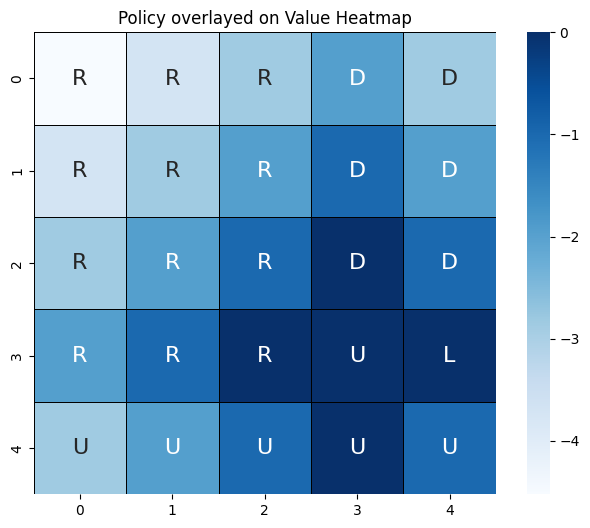

In [ ]:
mdp = MazeMDP(maze)

# Create a Value Iteration agent
agent = ValueIterationAgent(mdp)

# Visualize the values as a heatmap
agent.visualize_policy(agent.policy)


# **Policy Evaluation**

Given an MDP $M$ and a policy $\pi$ the goal of policy evaluation is to return $V^\pi$ for all states in $M$.

There are 2 ways to do that:

1. A closed form matrix solution: We can simple use the bellman backup solution since in the case of convergence, the value function under any policy should satisfy the Bellman equation.

$V_\pi = R + \gamma T * V_\pi$

$V_\pi = (I - \gamma T)^{-1} R$

where, $T$ is the $n\times n$ transition matrix, $R$ is the $n$ dim reward vector and $I$ is the identity matrix.

2. An iterative approach where you start with some initial estimate of the value function and repeatedly apply the Bellman backup until convergence.


In [ ]:
class PolicyEvaluationAgent:
    def __init__(self, mdp, policy, discount_factor=0.95, threshold=1e-4):
        self.mdp = mdp
        self.policy = policy
        self.discount_factor = discount_factor
        self.threshold = threshold

        # Initialize V(s) = 0
        self.V = {s: 0 for s in self.mdp.S}

    def policy_evaluation_matrix_version(self):
        """
            Returns V(s) for all states in MDP

            V_pi = R + \gamma T * V_pi

            V_pi = (I - \gamma T)^-1 R

            V_pi: (n)
            R: (n)
            T: (n x n)
        """
        n = len(self.mdp.S) # number of states in the MDP

        # Create the identity matrix
        I = np.eye(n) # n x n

        # Create the Transition and Reward matrices
        T = np.zeros((n, n))
        R = np.zeros(n)

        for i, s in enumerate(self.mdp.S):
            a = self.policy[s] # action under the policy \pi
            for j, s_prime in enumerate(self.mdp.S):
                T[i, j] = # TODO
                R[i] = # TODO

        # compute V_pi in a single shot using numpy matrix inverse (np.linalg.inv()) and multiplication
        V_pi = # TODO

        return V_pi

    def policy_evaluation_iterative_version(self, num_iterations=100):
        """
            This version uses iterative updates to compute V_pi(s).

            The iterative updates are based on the Bellman Backup.
            However, it is a simpler version as you don't have to perform the `max`
            operation, because you are GIVEN a policy \pi.

            V_pi(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s, \pi(s), s') V_pi(s')
        """
        # initializing the value functions to 0
        V = {s: 0 for s in self.mdp.S}
        new_V = {}

        for _ in range(num_iterations):
            for s in self.mdp.S:
                a = self.policy[s]
                # TODO


            V = new_V.copy() # re-assign V to the updated new_V
        return new_V



In [ ]:
# Let's define a random policy to begin with
import random
random_policy = {s: random.choice(mdp.A) for s in mdp.S}
random_policy_eval = PolicyEvaluationAgent(mdp, random_policy)
V_pi_matrix = random_policy_eval.policy_evaluation_matrix_version()


# how about we run on the Optimal policy we obtained using Value Iteration

policy_eval = PolicyEvaluationAgent(mdp, agent.policy)
V_pi_matrix = policy_eval.policy_evaluation_matrix_version()

############### MATRIX VERSION ###############

# The optimal value functions must be the same!
assert np.abs(V_pi_matrix - list(agent.V.values())).sum() == 0

############### ITERATIVE VERSION ###############
V_pi_iterative = policy_eval.policy_evaluation_iterative_version()

# The optimal value functions must be within some error!
assert np.abs(np.array(list(V_pi_iterative.values())) - list(agent.V.values())).sum() < 1e-6


# **Policy Iteration**

Policy Iteration, like value iteration is an algorithm to compute a policy. In Value iteration, we obtained the policy implicitly by taking the `max` over all state-action values: $Q(s, a)$.

In policy iteration, we will alternate between policy evaluation (we just looked at it in the above section) and policy improvement.

In [ ]:
class PolicyIterationAgent:
    def __init__(self, mdp, discount_factor=0.95, threshold=1e-4):
        self.mdp = mdp
        self.discount_factor = discount_factor
        self.threshold = threshold

        # Initialize V(s) = 0
        self.V = {s: 0 for s in self.mdp.S}

        # Initilize a random policy
        self.policy = {s: random.choice(self.mdp.A) for s in self.mdp.S}

        def policy_evaluation_matrix_version(self):
            """
                Returns V(s) for all states in MDP

                V_pi = R + \gamma T * V_pi

                V_pi = (I - \gamma T)^-1 R

                V_pi: (n)
                R: (n)
                T: (n x n)
            """
            n = len(self.mdp.S) # number of states in the MDP

            # Create the identity matrix
            I = np.eye(n) # n x n

            # Create the Transition and Reward matrices
            T = np.zeros((n, n))
            R = np.zeros(n)

            for i, s in enumerate(self.mdp.S):
                a = self.policy[s] # action under the policy \pi
                for j, s_prime in enumerate(self.mdp.S):
                    T[i, j] = self.mdp.T(s, a, s_prime)
                    R[i] = self.mdp.R(s, a)

            # compute V_pi in a single shot
            V_pi = np.linalg.inv(I - self.discount_factor * T) @ R

            return V_pi

    def policy_evaluation_iterative_version(self, num_iterations=100):
        """
            This version uses iterative updates to compute V_pi(s).

            The iterative updates are based on the Bellman Backup.
            However, it is a simpler version as you don't have to perform the `max`
            operation, because you are GIVEN a policy \pi.

            V_pi(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s, \pi(s), s') V_pi(s')
        """
        V = {s: 0 for s in self.mdp.S}
        new_V = {}

        for _ in range(num_iterations):
            for s in self.mdp.S:
                a = self.policy[s]
                new_V[s] = self.mdp.R(s, a)
                for s_prime in self.mdp.S:
                    new_V[s] += self.discount_factor * (self.mdp.T(s, a, s_prime) * V[s_prime])


            V = new_V.copy()
        return new_V

    def get_Q_values(self, V):

        # Initialize Q-values
        Q = {(s, a): 0 for s in self.mdp.S for a in self.mdp.A}

        for s in self.mdp.S:
            for a in self.mdp.A:
                # TODO
                # Get Q[s, a] for all s and a
        return Q


    def policy_improvement(self, Q):
        curr_policy = self.policy

        for s in self.mdp.S:
            arg_max_action = None
            max_Q_value = float('-inf')
            # TODO

        return curr_policy

    def policy_iteration(self, num_iterations=100):

        for _ in range(num_iterations):
            # Policy evaluation step
            V = self.policy_evaluation_iterative_version()

            # get Q values
            Q = self.get_Q_values(V)

            # Policy Improvement step
            new_policy = self.policy_improvement(Q)
            self.policy = new_policy

        return new_policy


In [ ]:
policy_iter_agent = PolicyIterationAgent(mdp)
policy = policy_iter_agent.policy_iteration()


In [ ]:
# policy should be same except at the goal state

agent.visualize_policy(agent.policy) # Value Iteration policy
agent.visualize_policy(policy) # Policy Iteration policy

**NOTE**: Multiple runs of the policy iteration **MAY** return different policies -- because there may be more than one _optimal_ paths to the goal.